<a href="https://colab.research.google.com/github/davriffe/Finance-Week/blob/master/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

import numpy as np 
from matplotlib import style

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [10]:
pip install pandas_datareader

In [11]:
pip install yfinance

In [12]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
start = datetime.datetime(2014,1,1)
end= datetime.datetime(2019,1,1)
yf.pdr_override()
df_full = yf.download("aapl",start = start,end=end).reset_index()
df_full.to_csv('aapl.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,79.38,79.58,78.86,79.02,71.32,58671200
1,2014-01-03,78.98,79.10,77.20,77.28,69.75,98116900
2,2014-01-06,76.78,78.11,76.23,77.70,70.13,103152700
3,2014-01-07,77.76,77.99,76.85,77.15,69.63,79302300
4,2014-01-08,76.97,77.94,76.96,77.64,70.07,64632400


In [13]:

import pandas as pd
df = pd.read_csv('aapl.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,79.38,79.58,78.86,79.02,71.32,58671200
1,2014-01-03,78.98,79.10,77.20,77.28,69.75,98116900
2,2014-01-06,76.78,78.11,76.23,77.70,70.13,103152700
3,2014-01-07,77.76,77.99,76.85,77.15,69.63,79302300
4,2014-01-08,76.97,77.94,76.96,77.64,70.07,64632400
5,2014-01-09,78.11,78.12,76.48,76.65,69.18,69787200
6,2014-01-10,77.12,77.26,75.87,76.13,68.72,76244000
7,2014-01-13,75.70,77.50,75.70,76.53,69.08,94623200
8,2014-01-14,76.89,78.10,76.81,78.06,70.45,83140400
9,2014-01-15,79.07,80.03,78.81,79.62,71.87,97909700


In [14]:

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
1228    206.4252
1229    206.5305
1230    206.5468
1231    206.4792
1232    206.3893
1233    206.2870
1234    206.1932
1235    206.0705
1236    205.9884
1237    205.8947
1238    205.8157
1239    205.7675
1240    205.6360
1241    205.4891
1242    205.2753
1243    205.0828
1244    204.8662
1245    204.6586
1246    204.4677
1247    204.2090
1248    203.9173
1249    203.6526
1250    203.3684
1251    203.0546
1252    202.6767
1253    202.1503
1254    201.6683
1255    201.17

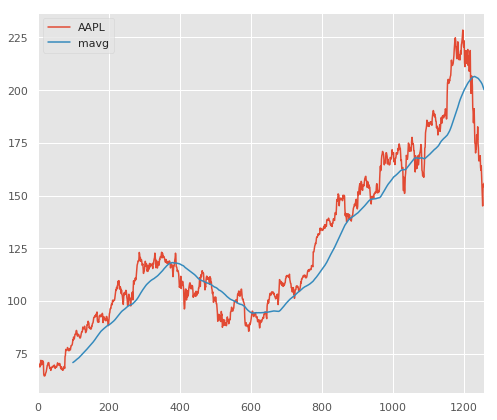

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

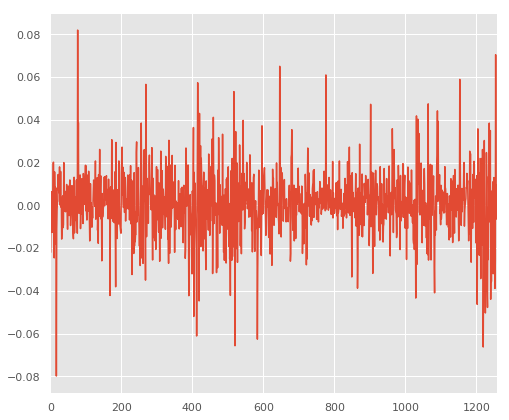

In [16]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')